# <font color= 'blue'>House Sales in King County, USA</font>

House Rocket is an online platform that negociate properties in USA.

**== Business Problem ==**

The CEO wants to maximize the profit's company by finding good deals.

**== Current Main Strategy ==**

External sources to find good deals.


**== What the CEO wants from the Data Scientists? ==**

Insight from the data company to find good properties.

**== Questions ==**

**1** How many properties are available for sale?

**2** How many attributes for each house? (number of rooms, number of garages, m2 etc)

**3** What are the attributes?

**4** What is the most expensive house?

**5** Which house has the greatest number oh bedrooms? 

**6** What is the average and median of rooms for each house?

**7** How many houses have 2 bathrooms?

**8** What is the average price of the houses?

**9** What is the average price of 2-bathroom houses?

**10** What is the lowest price for 3-bedroom houses?

**11** How many houses have more than 300 square meters for the living room?

**12** How many houses have more than 2 floors?

**13** How many houses are seaside?

**14** How many seaside houses have 3 bedrooms?

**15** How many houses with more than 300 square meters for the living room have more than 2 bathrooms?

**== Solution Planning ==**

Deliverables: reports and dashboard.

**== Dataset ==**
https://www.kaggle.com/harlfoxem/housesalesprediction


# 0.0. Imports

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import Image, HTML
from datetime import datetime
from plotly import express as px

## 0.1. Helper Functions

In [9]:
 def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings() 

Populating the interactive namespace from numpy and matplotlib


/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 0.2. Load dataset

In [12]:
# load data
df_raw = pd.read_csv('/Users/anaotavio/Documents/repos/house_sales/data/kc_house_data.csv')

# 1.0. Data Description

In [13]:
df1 = df_raw.copy()

In [14]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.1. Data dimensions

In [16]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 21613
Number of Columns: 21


## 1.2. Data types

In [34]:
df1['date'] = pd.to_datetime( df1['date'])

In [35]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [36]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 Descriptive Statistical

In [37]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [38]:
# Central Tendency - mean, median
t1 = pd.DataFrame (num_attributes.apply(np.mean)).T
t2 = pd.DataFrame (num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skwe, kutosis
d1 = pd.DataFrame (num_attributes.apply(np.std)).T
d2 = pd.DataFrame (num_attributes.apply(np.min)).T
d3 = pd.DataFrame (num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concat
m1 = pd.concat([d2, d3, d4, t1, t2, d1, d5, d6]).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580302e+09,3.904930e+09,2.876499e+09,0.243329,-1.260542
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.400881e+05,4.500000e+05,3.671187e+05,4.024069,34.585540
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.370842e+00,3.000000e+00,9.300403e-01,1.974300,49.063653
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,2.114757e+00,2.250000e+00,7.701453e-01,0.511108,1.279902
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.079900e+03,1.910000e+03,9.184196e+02,1.471555,5.243093
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.510697e+04,7.618000e+03,4.141955e+04,13.060019,285.077820
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.494309e+00,1.500000e+00,5.399764e-01,0.616177,-0.484723
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02,11.385108,127.632494
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01,3.395750,10.893022
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01,1.032805,0.525764


/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

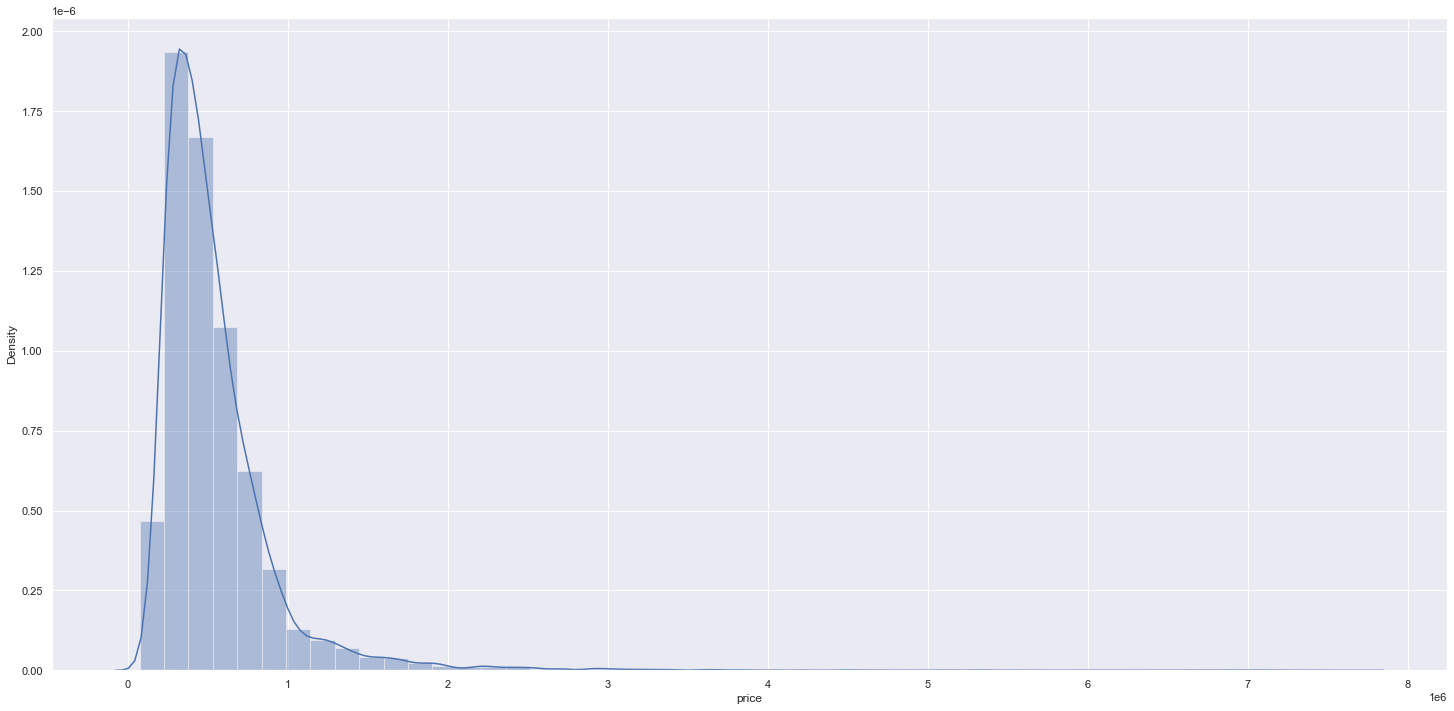

In [39]:
sns.distplot(df1['price'])

# 2.0 == Questions ==

### 2.1 How many properties are available for sale?

In [154]:
num_houses_unique = df1.shape[0]
print('The number of properties availabe for sale is {}.'.format(df1.shape[0]))

The number of properties availabe for sale is 21613.


### 2.2  How many attributes for each house? (number of rooms, number of garages, m2 etc)

In [156]:
num_attributes = len( df1.columns ) - 2
# id e date - no attributes
print('The number of attributes is {}.'.format(len( df1.columns ) - 2))

The number of attributes is 19.


### 2.3 What are the attributes?

In [159]:
df = df1.drop( ['id', 'date'], axis=1 )
print( df.columns.tolist() )

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### 2.4 What is the most expensive house?

In [164]:
house_expensive = df1[['id', 'price']].sort_values( 'price', ascending=False ).loc[0,'id']

print('The most expensive house is {}.'.format(house_expensive))

The most expensive house is 7129300520.


### 2.5 Which house has the greatest number oh bedrooms?

In [177]:
df = df1[['id', 'bedrooms']].sort_values( 'bedrooms', ascending=False )
print('The house with greatest number of bedrooms is {}'.format(df.iloc[0,0]))

The house with greatest number of bedrooms is 2402100895


### 2.6 What is the total sum of bedrooms of dataset?

In [181]:
print( 'Total sum of bedrooms is {}.'.format( df1['bedrooms'].sum() ) )

Total sum of bedrooms is 72854.


### 2.7 How many houses have 2 bathrooms?

In [110]:
print('The number of houses with 2 bathrooms is {}.'.format(df1[df1['bathrooms']==2].shape[0]))

The number of houses with 2 bathrooms is 1930.


### 2.8 What is the average price of the houses?

In [111]:
print('The average price of the houses is {:.2f}.'.format(df1['price'].mean()))

The average price of the houses is 540088.14.


### 2.9 What is the average price of 2-bathroom houses?

In [121]:
print('The average price of 2-bathroom houses is {:.2f}.'.format(df1[df1['bathrooms']==2]['price'].mean()))

The average price of 2-bathroom houses is 457889.72.


### 2.10 What is the lowest price for 3-bedroom houses?

In [123]:
print('The lowest price for 3-bedroom houses is {:.2f}.'.format(df1[df1['bedrooms']==3]['price'].min()))

The lowest price for 3-bedroom houses is 82000.00.


### 2.11 How many houses have more than 300 square meters for the living room?


In [127]:
print('The number of houses that have more than 300 sqft meters for living room is {}.'.format(df1[df1['sqft_living']>300].shape[0]))

The number of houses that have more than 300 sqft meters for living room  is 21612.


### 2.12 How many houses have more than 2 floors?

In [129]:
print('The number of houses that have more than 2 floors is {}.'.format(df1[df1['floors']>2].shape[0]))

The number of houses that have more than 2 floors is 782.


### 2.13 How many houses are seaside?

In [182]:
print('The number of seaside houses is {}.'.format(df1[df1['waterfront']==1].shape[0]))

The number of seaside houses is 163.


### 2.14 How many seaside houses have 3 bedrooms?

In [184]:
print('The number of seaside houses with 3 bedrooms is {}.'.format(df1[(df1['bedrooms']>2) & (df1['waterfront']==1)].shape[0]))

The number of seaside houses with 3 bedrooms is 127.


### 2.15 How many houses with more than 300 square meters for the living room have more than 2 bathrooms?


In [185]:
print('The number of houses with more than 300 square meters for the living room and more than 2 bathrooms is {}.'.format(df1[(df1['sqft_living']>300) & (df1['bathrooms']>2)].shape[0]))

The number of houses with more than 300 square meters for the living room and more than 2 bathrooms is 11242.
